In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df = df.iloc[:, :8]
df.head()

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no


In [8]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 11162 rows and 8 columns.


In [9]:
df.duplicated().sum()

846

In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [13]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
dtype: object

In [14]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
dtype: object

In [15]:
for col in cat_cols:
    print(f'{col}:')
    print(df[col].unique())
    print('\n')

job:
['admin.', 'technician', 'services', 'management', 'retired', ..., 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']


marital:
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


education:
['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


default:
['no', 'yes']
Categories (2, object): ['no', 'yes']


housing:
['yes', 'no']
Categories (2, object): ['no', 'yes']


loan:
['no', 'yes']
Categories (2, object): ['no', 'yes']




## EDA

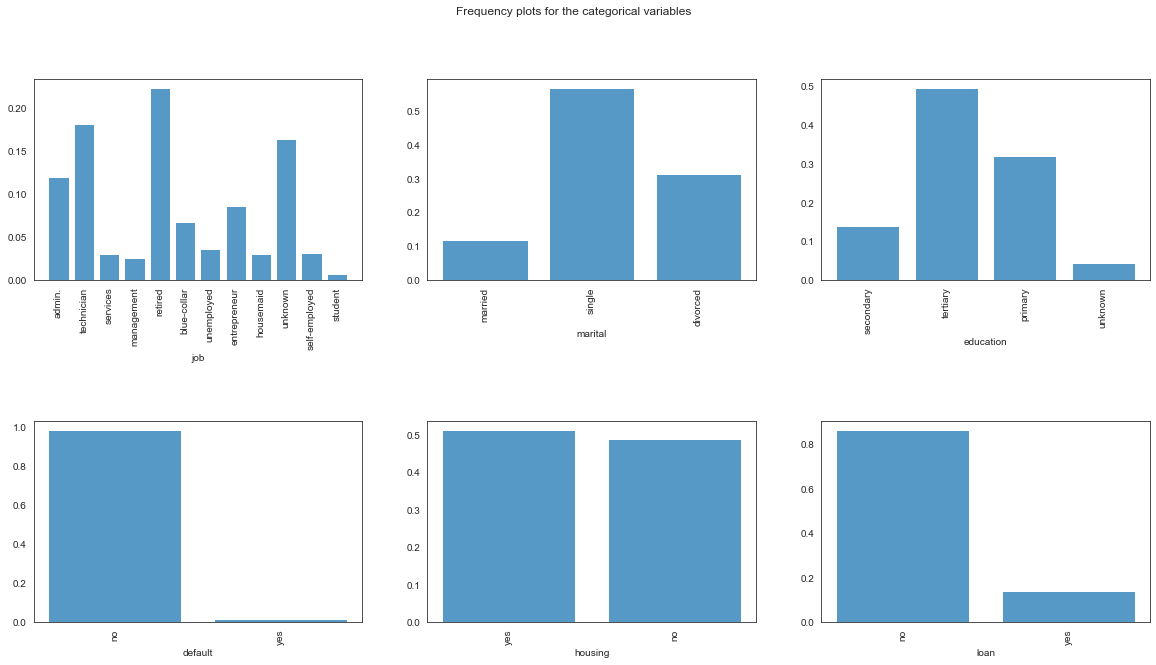

In [16]:
sns.set_style('white')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = df['job'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,0])
axs[0,0].set_xticklabels(list(df['job'].unique()), rotation = 90)
sns.histplot(x = df['marital'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,1])
axs[0,1].set_xticklabels(list(df['marital'].unique()), rotation = 90)
sns.histplot(x = df['education'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,2])
axs[0,2].set_xticklabels(list(df['education'].unique()), rotation = 90)
sns.histplot(x = df['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,0])
axs[1,0].set_xticklabels(list(df['default'].unique()), rotation = 90)
sns.histplot(x = df['housing'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,1])
axs[1,1].set_xticklabels(list(df['housing'].unique()), rotation = 90)
sns.histplot(x = df['loan'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,2])
axs[1,2].set_xticklabels(list(df['loan'].unique()), rotation = 90)

plt.suptitle('Frequency plots for the categorical variables')

for ax in axs.ravel():
    ax.set_ylabel('')

plt.show()

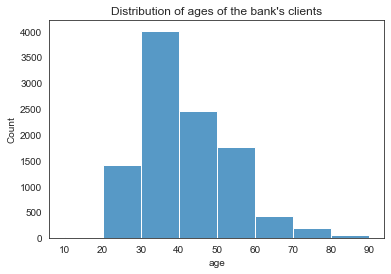

In [18]:
sns.histplot(data=df, x='age', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title("Distribution of ages of the bank's clients")
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.ylabel('Count')
plt.show()

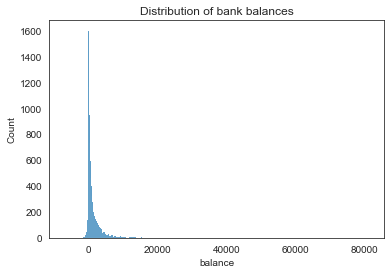

In [20]:
sns.histplot(data=df, x='balance')
plt.title("Distribution of bank balances")
plt.ylabel('Count')
plt.show()

## Clustering

In [22]:
data_kmeans = pd.get_dummies(df, drop_first=True)
scaler = MinMaxScaler()
data_kmeans = scaler.fit_transform(data_kmeans)

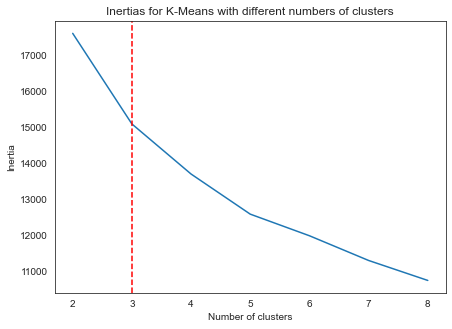

In [23]:
# One-hot encoding and scaling the features:

data_kmeans = pd.get_dummies(df, drop_first=True)
scaler = MinMaxScaler()
data_kmeans = scaler.fit_transform(data_kmeans)

# Running the K-Means algorithm for different numbers of clusters:

n_clusters = list(range(2, 9))
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    kmeans.fit(data_kmeans)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plotting the inertia:

plt.figure(figsize=(7, 5))
plt.plot(n_clusters, inertias)
plt.axvline(3, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertias for K-Means with different numbers of clusters')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-means'] = kmeans.fit_predict(data_kmeans)

## K - MOdes clustering

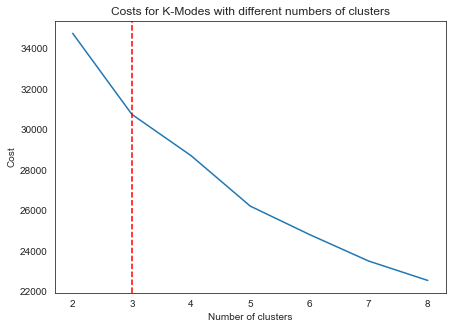

In [28]:
# Binning the age columns and one-hot encoding:

data_kmodes = df.drop('cluster_k-means', axis=1).copy()
data_kmodes['age_binned'] = pd.cut(data_kmodes['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype('category')
data_kmodes.drop('age', axis=1, inplace=True)
data_kmodes['balance_binned'] = pd.cut(data_kmodes['balance'], bins=[2000, 5000, 10000, 20000, 50000, 100000]).astype('category')
data_kmodes.drop('balance', axis=1, inplace=True)
data_kmodes = pd.get_dummies(data_kmodes, drop_first=True)

# Running the K-Modes algorithm for different numbers of clusters:

n_clusters = list(range(2, 9))
costs = []

for n in n_clusters:
    kmodes = KModes(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    kmodes.fit(data_kmodes)
    cost = kmodes.cost_
    costs.append(cost)

# Plotting the cost:

plt.figure(figsize=(7,5))
plt.plot(n_clusters, costs)
plt.axvline(3, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Costs for K-Modes with different numbers of clusters')
plt.show()

In [29]:
kmodes = KModes(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-modes'] = kmodes.fit_predict(data_kmodes)

## Heirarchal clustering

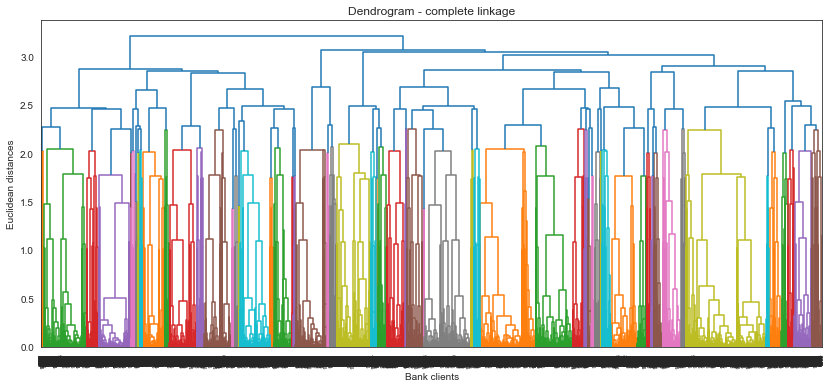

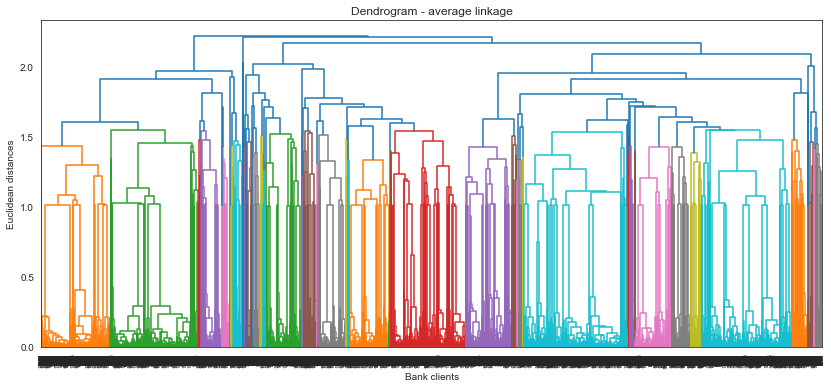

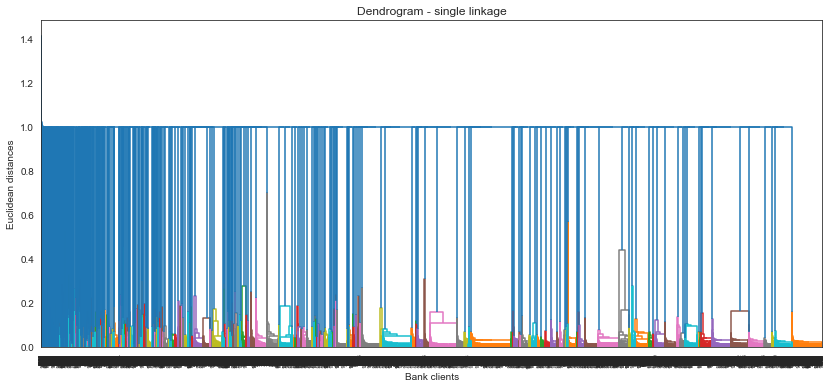

In [30]:
data_hc = data_kmeans.copy()

plt.figure(figsize=(14, 6))
hc_complete = linkage(data_hc, method='complete')
dendrogram_complete = dendrogram(hc_complete)
plt.title('Dendrogram - complete linkage')
plt.xlabel('Bank clients')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(14, 6))
hc_average = linkage(data_hc, method='average')
dendrogram_average = dendrogram(hc_average)
plt.title('Dendrogram - average linkage')
plt.xlabel('Bank clients')
plt.ylabel('Euclidean distances')
plt.show()

plt.figure(figsize=(14, 6))
hc_single = linkage(data_hc, method='single')
dendrogram_single = dendrogram(hc_single)
plt.title('Dendrogram - single linkage')
plt.xlabel('Bank clients')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
df['cluster_hc'] = cut_tree(hc_complete, 3)[:, 0]


## Dimensionality reduction using PCA and evaluation of the considered clustering algorithms

In [6]:
# Scaling the original features:

features = df.iloc[:, :8]
features = pd.get_dummies(features, drop_first=True)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Getting the first two principal components:

pca = PCA(2)
data_pca = pd.DataFrame(pca.fit_transform(features), columns=['Principal component 1', 'Principal component 2'])

# Printing the explained variance ratio:

explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
print(f'Proportion of variance of the original features explained by the first two principal components: {explained_variance_ratio}')

# Appending the cluster labels to the PCA dataframe:

data_pca = pd.concat([data_pca, df.iloc[:, 8:11]], axis=1)



NameError: name 'df' is not defined

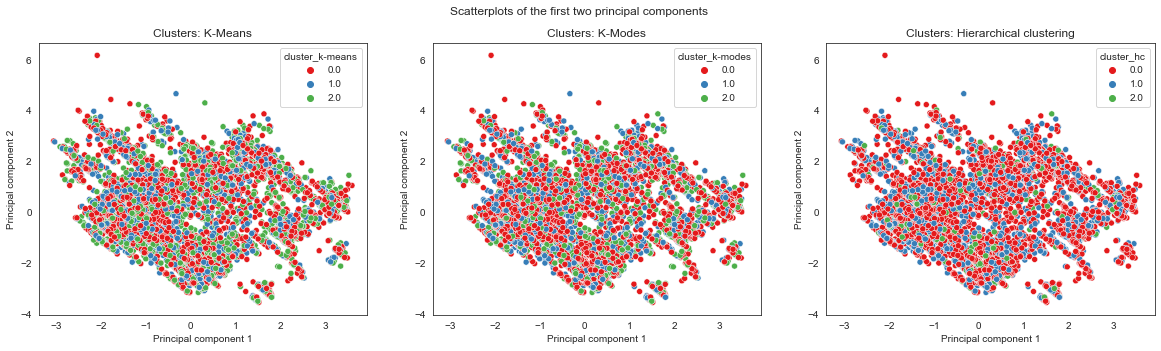

In [35]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.scatterplot(data=data_pca, x='Principal component 1', y='Principal component 2', hue='cluster_k-means', ax=axs[0], palette='Set1')
axs[0].set_title('Clusters: K-Means')
sns.scatterplot(data=data_pca, x='Principal component 1', y='Principal component 2', hue='cluster_k-modes', ax=axs[1], palette='Set1')
axs[1].set_title('Clusters: K-Modes')
sns.scatterplot(data=data_pca, x='Principal component 1', y='Principal component 2', hue='cluster_hc', ax=axs[2], palette='Set1')
axs[2].set_title('Clusters: Hierarchical clustering')
fig.suptitle('Scatterplots of the first two principal components')
plt.show()

In [37]:
df.drop(['cluster_k-means', 'cluster_hc'], axis=1, inplace=True)

## Exploring the data by cluster

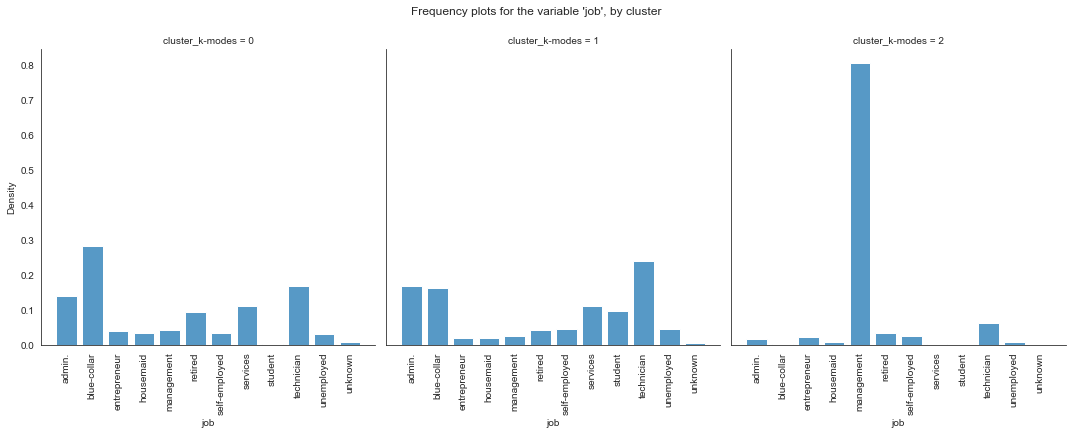

In [38]:
g = sns.displot(data=df, x='job', col='cluster_k-modes', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.set_xticklabels(rotation=90)
g.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)
plt.show()

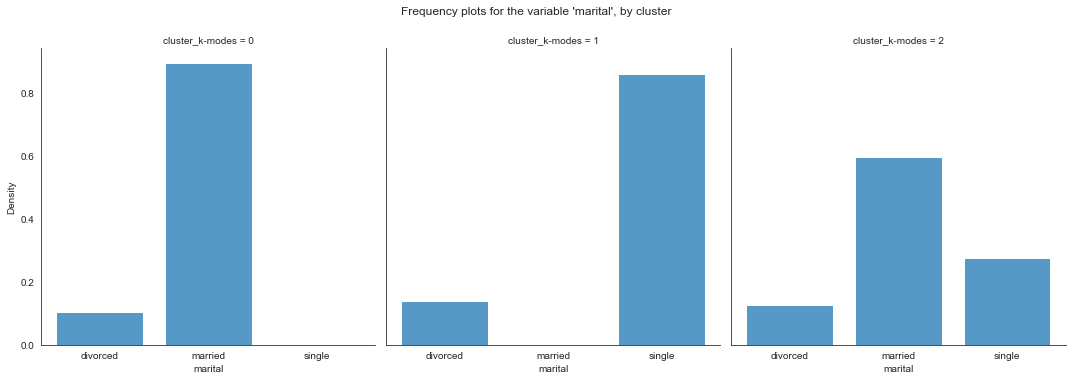

In [39]:
g = sns.displot(data=df, x='marital', col='cluster_k-modes', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)
plt.show()

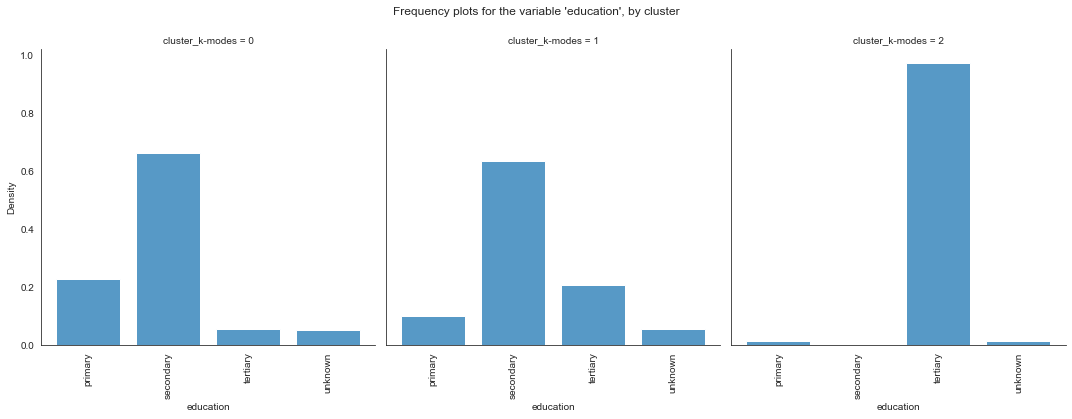

In [40]:
g = sns.displot(data=df, x='education', col='cluster_k-modes', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.set_xticklabels(rotation=90)
g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)
plt.show()

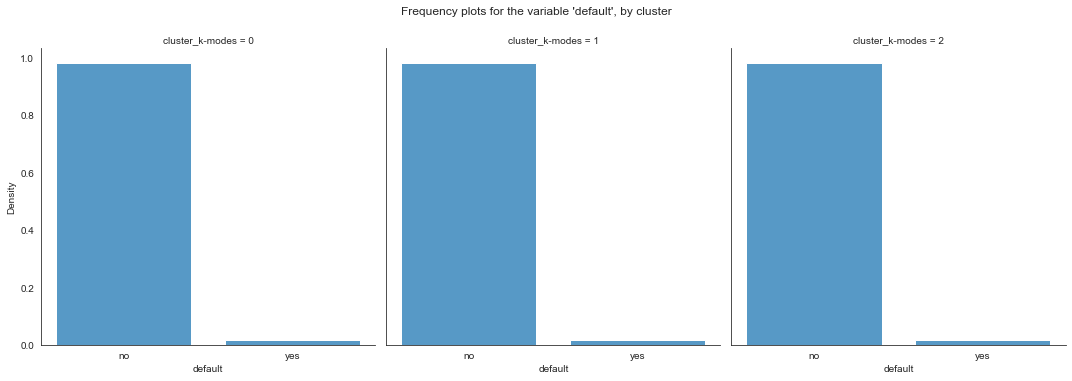

In [41]:
g = sns.displot(data=df, x='default', col='cluster_k-modes', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'default', by cluster", y=1.05)
plt.show()

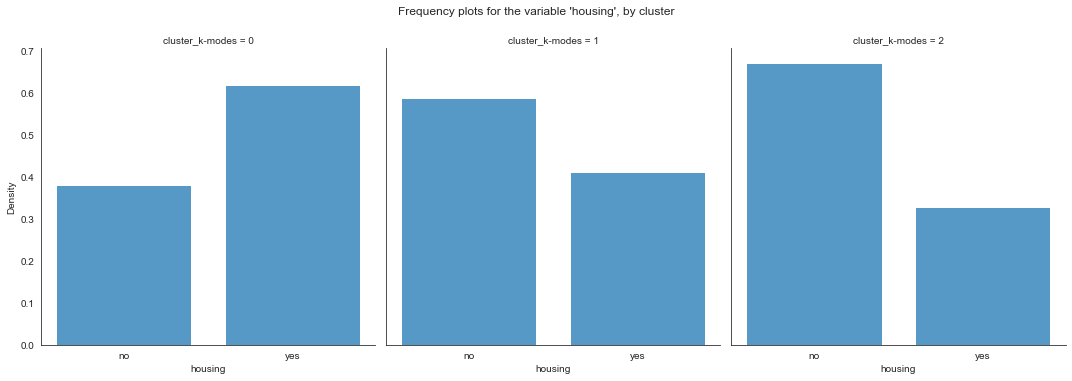

In [42]:
g = sns.displot(data=df, x='housing', col='cluster_k-modes', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)
plt.show()

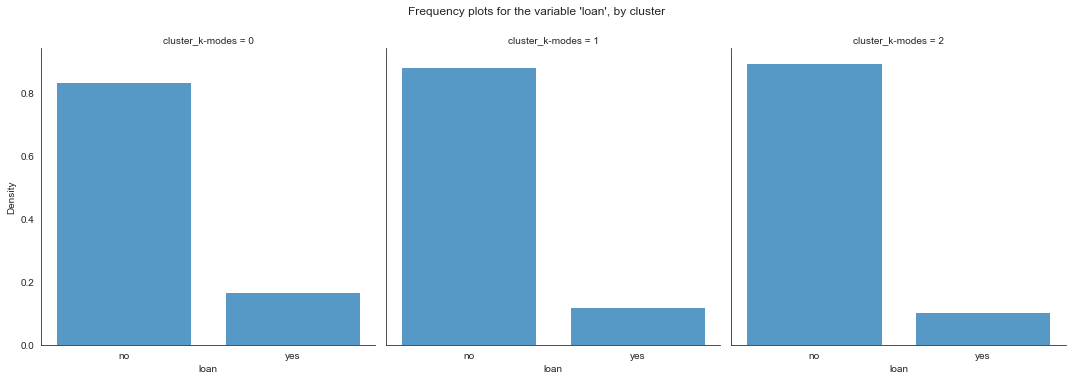

In [43]:
g = sns.displot(data=df, x='loan', col='cluster_k-modes', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
g.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)
plt.show()

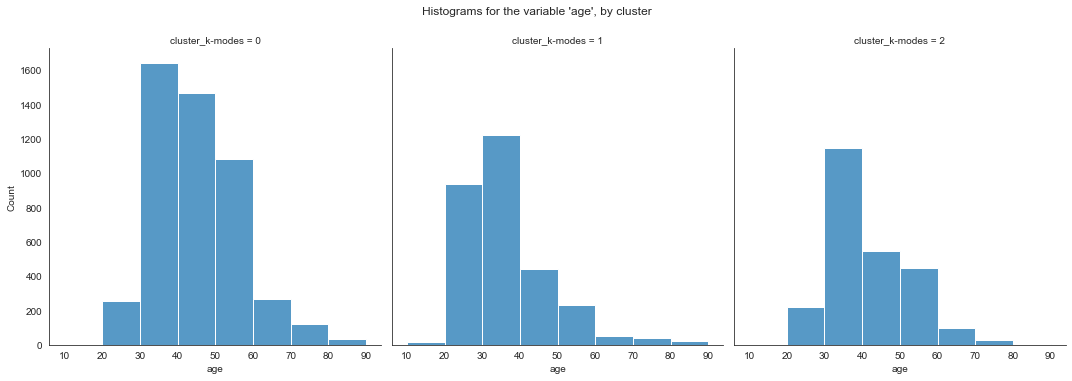

In [44]:
g = sns.displot(data=df, x='age', col='cluster_k-modes', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)
plt.show()

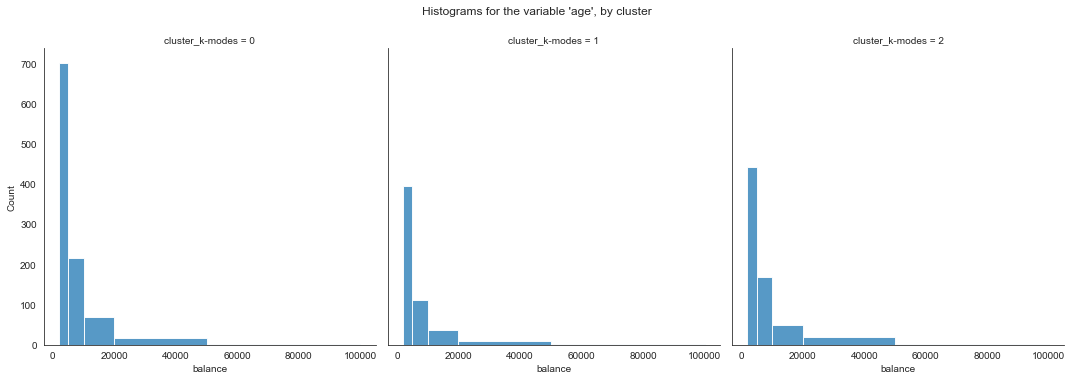

In [45]:
g = sns.displot(data=df, x='balance', col='cluster_k-modes', bins=[2000, 5000, 10000, 20000, 50000, 100000])
g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)
plt.show()

## Conclusion
# Summarizing the differences between the clusters:

In cluster 0, most clients are blue-collar workers or technicians, are married, are educated upto the primary or secondary levels, have housing loans, and are between 30 and 60 years of age.
In cluster 1, most clients are technicians, blue-collar workers or work administrative jobs, are single, are educated upto the secondary or tertiary levels, do not have housing loans, and are between 20 and 40 years of age.
In cluster 2, most clients work management jobs, are married, are educated upto the tertiary level, do not have housing loans, and are between 30 and 60 years of age.
It may be concluded that most of the clients in cluster 2 have the highest income, based on their jobs, education, and age. Clients in clusters 0 and 1 have lower incomes, but for different reasons -- the clients in cluster 1 are in general more educated, are employed in higher paying occupations, but are younger and hence have less working experience compared to the clients in cluster 0. It may also be concluded that based on the differences in education and employment between the clusters, most of the clients in clusters 1 and 2 have a greater degree of financial literacy than those in cluster 0.

Subsequently, it is likely that the highest proportion of clients that are certain about their need to have a term deposit and have a term deposit (or vice-versa) lie in cluster 2, followed by cluster 1 and then cluster 0. Based on the results of our clustering analysis, the bank should focus more on targeting clients in clusters 0 and 1. This could make the marketing campaign more effective as well as reduce costs of the marketing campaign.
